## Importing Libraries

- **pandas**: For data manipulation and analysis
- **sklearn.cluster**: For clustering algorithms
- **sklearn.model_selection**: For splitting the dataset into training and testing sets
- **sklearn.ensemble**: For building ensemble models
- **scipy.cluster.hierarchy**: For hierarchical clustering algorithms
- **matplotlib.pyplot**: For data visualization
- **seaborn**: For creating attractive and informative statistical graphics
- **random**: For generating random numbers
- **numpy**: For numerical computing


In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.spatial.distance import cdist
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import os


## Reading in the input data


In [3]:
# Load the data
try:
    data = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Could not find the input file. Please check the file path and try again.")
    exit()

## Viewing the first few rows of the data


In [4]:
data.head()

,device_name,min_consumption,max_consumption,device_age
0,bulb,100.0,120.0,3
1,LED TV 42 INCH,58.0,60.0,5
2,3''belt sander,1000.0,1000.0,4
3,Air cooler,65.0,80.0,4
4,Air purifier,25.0,30.0,3


## Getting values for input_power, working_hours, and output_power

This code cell generates values for the `input_power`, `working_hours`, and `output_power` columns of the `data` DataFrame based on the `min_consumption` and `max_consumption` columns.


In [5]:
min_c = data['min_consumption'].values
max_c = data['max_consumption'].values
random_consumption = [rd.uniform(min_c[i], max_c[i]) for i in range(len(min_c))]
working_hours = []
for i in range(len(min_c)):
    random_hours = rd.randint(0,24)
    working_hours.append(random_hours)
data['input_power'] = random_consumption
data['working_hours'] = working_hours
output_power = []
for i in range(len(min_c)):
    output_power.append(rd.uniform(random_consumption[i] * 0.70 , random_consumption[i]))
    output_power[i] = output_power[i]
data['output_power'] = output_power 
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power
0,bulb,100.0,120.0,3,106.076426,20,101.312316
1,LED TV 42 INCH,58.0,60.0,5,58.034543,10,41.020399
2,3''belt sander,1000.0,1000.0,4,1000.000000,18,989.767375
3,Air cooler,65.0,80.0,4,69.929518,22,54.157918
4,Air purifier,25.0,30.0,3,29.519419,12,24.526007


## Calculating efficiency metrics

This code cell calculates the `Enhanced_efficiency` and `efficiency` columns of the `data` DataFrame based on the `input_power`, `output_power`, and `min_consumption` columns.


In [6]:
Enhanced_efficiency = []
for i in range(len(min_c)):
    Enhanced_efficiency.append(output_power[i]/random_consumption[i]*100)
data['Enhanced_efficiency'] = Enhanced_efficiency
efficiency = data['output_power']/data['min_consumption']*100
data['efficiency'] = efficiency
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,106.076426,20,101.312316,95.508794,101.312316
1,LED TV 42 INCH,58.0,60.0,5,58.034543,10,41.020399,70.682729,70.724825
2,3''belt sander,1000.0,1000.0,4,1000.000000,18,989.767375,98.976737,98.976737
3,Air cooler,65.0,80.0,4,69.929518,22,54.157918,77.446434,83.319873
4,Air purifier,25.0,30.0,3,29.519419,12,24.526007,83.084315,98.104029


## Handling values


In [7]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,106.076426,20,101.312316,95.508794,101.312316
1,LED TV 42 INCH,58.0,60.0,5,58.034543,10,41.020399,70.682729,70.724825
2,3''belt sander,1000.0,1000.0,4,1000.000000,18,989.767375,98.976737,98.976737
3,Air cooler,65.0,80.0,4,69.929518,22,54.157918,77.446434,83.319873
4,Air purifier,25.0,30.0,3,29.519419,12,24.526007,83.084315,98.104029


## Adjusting efficiency values


In [8]:
List_efficiency = data['efficiency'].values
List_enhan_efficiency = data['Enhanced_efficiency'].values

for i in range(len(List_efficiency)):
    # if enhance efficiency is greater than enhance efficiency then minus abs value for efficiency
    if List_enhan_efficiency[i] > List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] - abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is less than enhance efficiency then plus abs value for efficiency
    elif List_enhan_efficiency[i] < List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is equal to enhance efficiency then plus abs value for efficiency
    else:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
data['efficiency'] = List_efficiency
#efficiency must between 40  to 70 but with formula that multiply with values that make it between 40 to 70
data['efficiency'] = data['efficiency'].apply(lambda x: x * 0.3 if x < 40 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: x * 0.7 if x > 70 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: 40 if x < 40 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: 70 if x > 70 else x)

data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 200 if x > 200 else x)
data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 0 if x < 0 else x)
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,106.076426,20,101.312316,95.508794,70.000000
1,LED TV 42 INCH,58.0,60.0,5,58.034543,10,41.020399,70.682729,49.536845
2,3''belt sander,1000.0,1000.0,4,1000.000000,18,989.767375,98.976737,69.283716
3,Air cooler,65.0,80.0,4,69.929518,22,54.157918,77.446434,62.435319
4,Air purifier,25.0,30.0,3,29.519419,12,24.526007,83.084315,70.000000


## Training a GradientBoostingRegressor model


In [9]:
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
Normal = GradientBoostingRegressor(random_state=0)
Normal.fit(X_train, y_train)
Normal.score(X_test, y_test)


0.0442119194522671

In [10]:
X.head()


,min_consumption,max_consumption,input_power
0,100.0,120.0,106.076426
1,58.0,60.0,58.034543
2,1000.0,1000.0,1000.000000
3,65.0,80.0,69.929518
4,25.0,30.0,29.519419


In [11]:
#feature to predict enhanced efficiency with K-centroid
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['Enhanced_efficiency']


In [12]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ghora = hc.fit_predict(X)
print(ghora)

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 1 0 2 2 0 0 0
 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 0
 0 0 2 0 0 0 0 0 2 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
ghora = pd.DataFrame(ghora)
ghora.describe()

,0
count,299.000000
mean,0.173913
std,0.540186
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [14]:
X.describe()

,min_consumption,max_consumption,input_power
count,299.000000,299.000000,299.000000
mean,549.509826,855.704057,697.905030
std,1088.167077,1806.556119,1416.457649
min,0.500000,0.000000,0.559864
25%,18.500000,26.300000,21.981312
50%,99.678000,150.000000,116.385064
75%,700.000000,933.500000,799.509915
max,8000.000000,14000.000000,10299.395089


In [15]:
def find_centroid(cluster):
    """
    Calculates the centroid of a cluster.

    Args:
    
        cluster: A list of data points.

    Returns:
        The centroid of the cluster.
    """
    # get |c|
    centroid = sum(cluster) / len(cluster)
    return centroid

## k-centroid hierarchical clustering


In [16]:
import numpy as np

def hierarchical_clustering(dataset, k):
    """
    Performs hierarchical clustering on the given dataset using k-centroid link.

    Args:
        dataset: A list of data points.
        k: The number of neighbors of a centroid.

    Returns:
        A tuple containing a list of clusters and a dictionary mapping each object to its cluster ID.
    """
    # Initialize the clusters.
    clusters = [[x] for x in dataset]
    cluster_ids = {tuple(x): i for i, cluster in enumerate(clusters) for x in cluster}
    
    # Iterate over all pairs of clusters.
    for _ in range(len(dataset) - 1):
        min_distance = float('inf')
        merge_clusters = ()
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Calculate the distance between the two clusters.
                dist_1 = []
                dist_2 = []
                
                # Find centroids for clusters Ci and Cj.
                centroid_i = find_centroid(clusters[i])
                centroid_j = find_centroid(clusters[j])
                
                # Calculate distances from objects in Ci to centroid_i.
                for obj in clusters[i]:
                    dist_1.append(np.linalg.norm(obj - centroid_i))
                
                # Calculate distances from objects in Cj to centroid_j.
                for obj in clusters[j]:
                    dist_2.append(np.linalg.norm(obj - centroid_j))
                
                # Select the k nearest neighbors from each cluster.
                dist_1 = sorted(dist_1)[:k]
                dist_2 = sorted(dist_2)[:k]
                
                neighbors = []
                for obj1 in dist_1:
                    for obj2 in dist_2:
                        # obj1 and obj2 are the distances from Ci to Cj and Cj to Ci respectively calculated above.
                        neighbors.append(obj1 + obj2)

                # Calculate the average = total distance / min(k, len(Ci) * len(Cj)).
                average_distance = sum(neighbors) / min(k, len(clusters[i]) * len(clusters[j]))
                if average_distance < min_distance:
                    min_distance = average_distance
                    # Store the closest pair of clusters.
                    merge_clusters = (i, j)
        
        # Merge the two closest clusters.
        merged_cluster = clusters[merge_clusters[0]] + clusters[merge_clusters[1]]
        clusters = [c for idx, c in enumerate(clusters) if idx not in merge_clusters]
        clusters.append(merged_cluster)
        
        # Update cluster IDs for objects in the merged cluster.
        for obj in merged_cluster:
            cluster_ids[tuple(obj)] = len(clusters) - 1
    
    # Return the list of clusters and the dictionary mapping each object to its cluster ID.
    return clusters, cluster_ids


In [17]:
# Perform clustering on the training data
k = 3
clusters, cluster_assignments = hierarchical_clustering(X.values, k)

In [18]:
clusters
cluster_assignments

{(100.0, 120.0, 106.0764263598645): 0,
 (58.0, 60.0, 58.03454259847337): 0,
 (1000.0, 1000.0, 1000.0): 0,
 (65.0, 80.0, 69.92951781833538): 0,
 (25.0, 30.0, 29.51941910955333): 0,
 (2.0, 3.0, 2.4835167957990176): 0,
 (2.0, 4.0, 3.2564405246229855): 0,
 (40.0, 80.0, 49.2796079401807): 0,
 (20.0, 50.0, 36.87821251457776): 0,
 (3.0, 6.0, 3.1574542611058893): 0,
 (60.0, 150.0, 63.111053632193446): 0,
 (60.0, 70.0, 61.09535527300652): 0,
 (1.0, 2.0, 1.0533306893354735): 0,
 (1000.0, 4000.0, 3667.5346816852616): 0,
 (800.0, 1400.0, 889.1639750279535): 0,
 (25.0, 30.0, 25.227493951080763): 0,
 (20.0, 30.0, 27.14656919656288): 0,
 (600.0, 850.0, 732.3559539556934): 0,
 (70.0, 150.0, 125.22364890308508): 0,
 (30.0, 60.0, 37.1476340347775): 0,
 (25.0, 35.0, 25.786744222298214): 0,
 (5.0, 9.0, 5.812922766676962): 0,
 (100.0, 450.0, 387.5714214534559): 0,
 (1200.0, 1500.0, 1265.2365644028703): 0,
 (200.0, 300.0, 287.18848407513724): 0,
 (26.0, 60.0, 52.488055463802624): 0,
 (8000.0, 14000.0, 10201

In [19]:
x_clusters = clusters[0]
x_clusters

[array([ 8000.        , 14000.        , 10201.16584547]),
 array([2000.        , 3000.        , 2628.12857783]),
 array([ 7500.        , 10500.        ,  7539.52726379]),
 array([220.        , 270.        , 254.40814672]),
 array([6600.        , 8800.        , 7639.31081172]),
 array([1300.        , 1500.        , 1366.61044572]),
 array([3250.        , 9750.        , 5146.09905755]),
 array([240.       , 860.       , 448.1132081]),
 array([1500.        , 4500.        , 2919.47146413]),
 array([ 3800.        , 11400.        , 10299.39508926]),
 array([3000.        , 7500.        , 6193.06387461]),
 array([ 50.        , 100.        ,  67.03862056]),
 array([ 500.        , 1800.        ,  748.76806295]),
 array([5400.        , 6750.        , 6562.65044089]),
 array([2000.        , 5000.        , 4327.09982994]),
 array([400.        , 700.        , 490.27304887]),
 array([1800.        , 5000.        , 2819.41181393]),
 array([100., 100., 100.]),
 array([ 4.        , 34.        ,  4.513092

In [20]:
#create seprate clustering for each cluster
temp_cluster = x_clusters
temp_cluster = pd.DataFrame(temp_cluster)
temp_cluster.head()

,0,1,2
0,8000.0,14000.0,10201.165845
1,2000.0,3000.0,2628.128578
2,7500.0,10500.0,7539.527264
3,220.0,270.0,254.408147
4,6600.0,8800.0,7639.310812


### Testing Standard Scaler

In [50]:
C1 = temp_cluster[[0]]
C2 = temp_cluster[[1]]
C3 = temp_cluster[[2]]

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
ghora1 = hc.fit_predict(C1)
ghora1 = pd.DataFrame(ghora1)

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
ghora2 = hc.fit_predict(C2)
ghora2 = pd.DataFrame(ghora2)

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
ghora3 = hc.fit_predict(C3)
ghora3 = pd.DataFrame(ghora3)

/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [51]:
ghora1.describe()

,0
count,299.000000
mean,1.003344
std,0.208837
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [52]:
ghora2.describe()

,0
count,299.000000
mean,0.976589
std,0.172196
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [53]:
ghora3.describe()

,0
count,299.000000
mean,0.030100
std,0.206676
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [54]:
total_std = ghora1.std() + ghora2.std() + ghora3.std()
total_std

0    0.587709
dtype: float64

In [26]:
X_new = pd.DataFrame()
for i, value in enumerate(x_clusters):
    X_new[i] = value
X_new = X_new.T
X_new.columns = ['min_consumption', 'max_consumption', 'input_power']
X_new.head()

/tmp/ipykernel_3042/2450358325.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new[i] = value
/tmp/ipykernel_3042/2450358325.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new[i] = value
/tmp/ipykernel_3042/2450358325.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new[i] = value
/

,min_consumption,max_consumption,input_power
0,8000.0,14000.0,10201.165845
1,2000.0,3000.0,2628.128578
2,7500.0,10500.0,7539.527264
3,220.0,270.0,254.408147
4,6600.0,8800.0,7639.310812


In [27]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_new)
print(y_hc)

[1 2 1 0 1 0 1 0 2 1 1 0 0 1 2 0 2 0 0 2 0 2 1 2 0 2 2 0 0 2 2 0 2 0 0 2 2
 2 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [28]:
#get standard deviation y_hc
std_y_hc = np.std(y_hc)
print(std_y_hc)

0.539281454735689


#### 0.8136512698596342 - ward
#### 0.19752271652486159 - complete
#### 0.1726866975709108 - single
#### 0.1823892736379395 - average



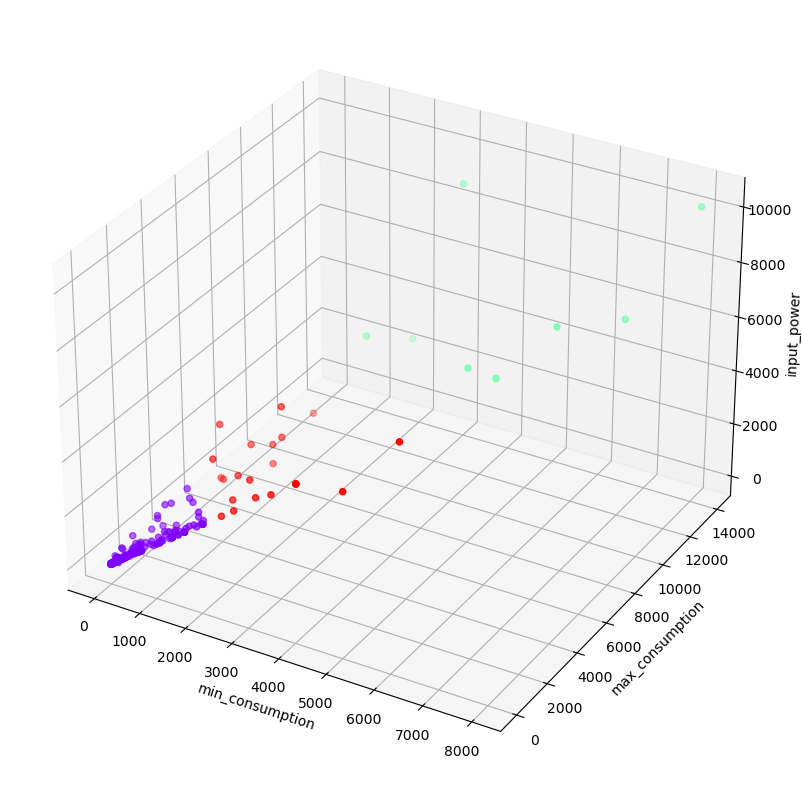

In [29]:
#plot 3d graph of normal and enhanced efficiency
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new['min_consumption'], X_new['max_consumption'], X_new['input_power'], c=y_hc, cmap='rainbow')
ax.set_xlabel('min_consumption')
ax.set_ylabel('max_consumption')
ax.set_zlabel('input_power')
plt.show()

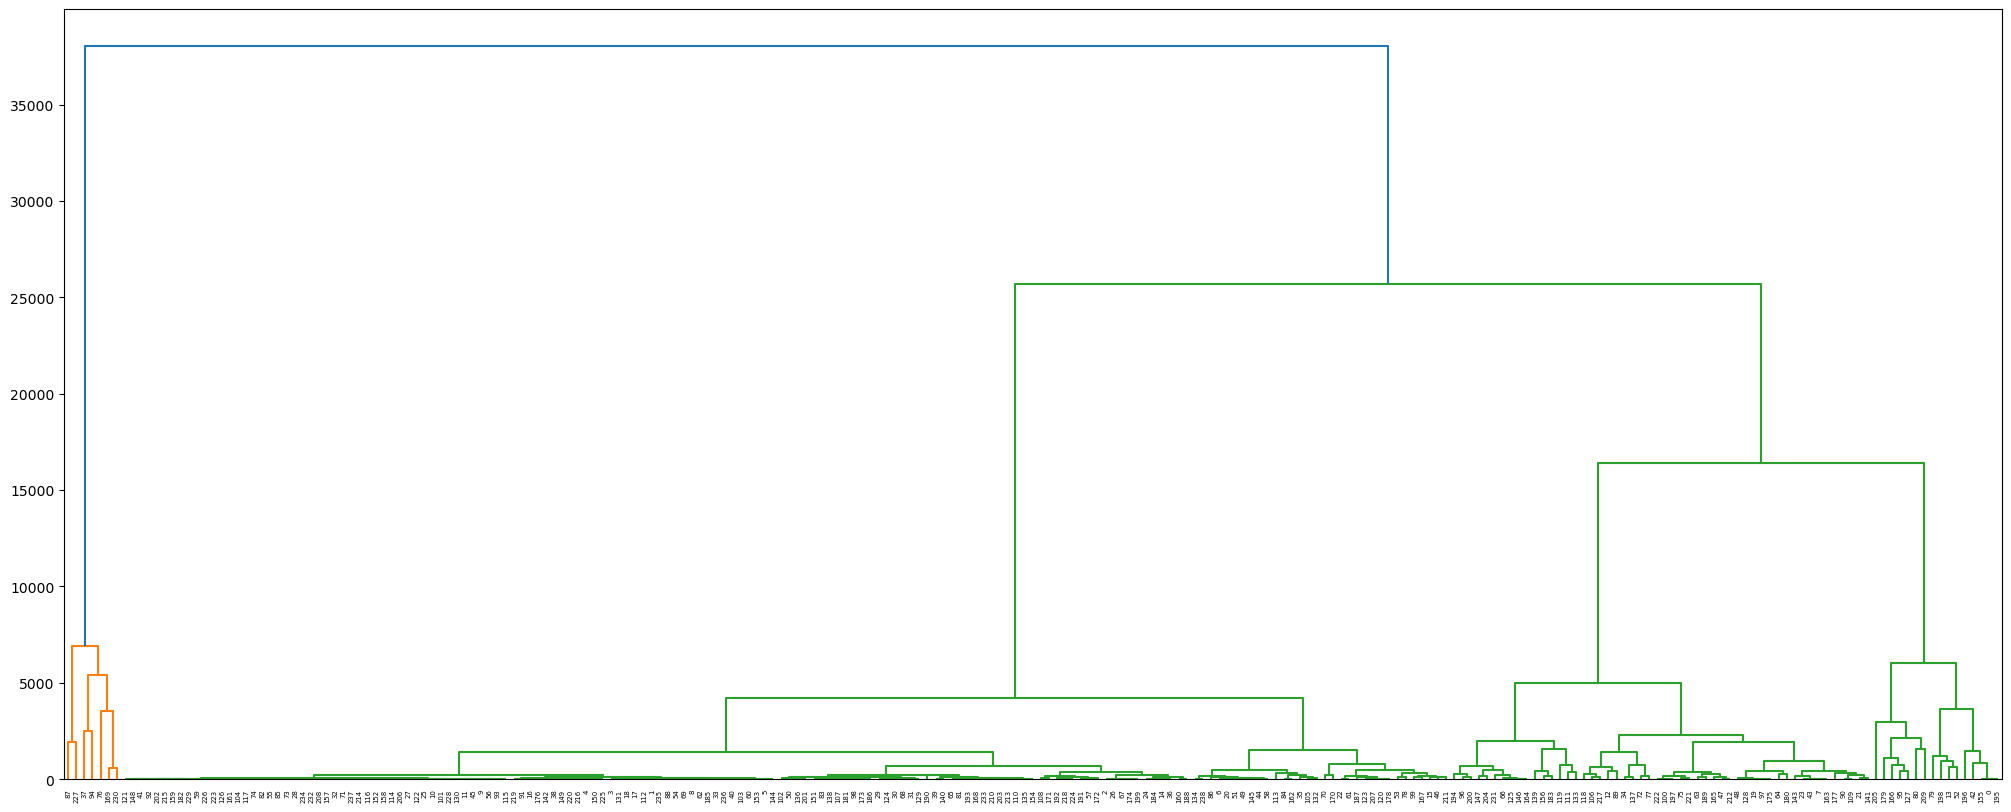

In [30]:
Z = linkage(X_train, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

## Gradient Boosting Regressor Model with Enhanced Efficiency


In [31]:
enhanced_features = X_new[['min_consumption', 'max_consumption', 'input_power']]
enhanced_efficiency = data['Enhanced_efficiency']
X_train, X_test, y_train, y_test = train_test_split(enhanced_features, enhanced_efficiency, test_size=0.2, random_state=0)
Enhanced = GradientBoostingRegressor(random_state=0)
Enhanced.fit(X_train, y_train)
Enhanced.score(X_test, y_test)


-0.12616433703289043

## Test input


In [32]:
Extra_test_data = [
    [150, 450, 250],
    [50, 300, 150],
    [250, 700, 475],
    [175, 475, 300],
    [125, 525, 350],
    [75, 250, 175],
    [225, 550, 375],
    [125, 450, 275],
    [25, 200, 100],
    [275, 575, 425],
    [125, 350, 225],
    [50, 150, 100],
    [275, 475, 375],
    [175, 375, 275],
    [225, 625, 425],
    [100, 300, 200],
    [200, 700, 450],
    [50, 200, 125],
    [275, 475, 350],
    [150, 400, 275],
    [125, 525, 350],
    [75, 275, 175],
    [225, 550, 350],
    [125, 450, 300],
    [25, 175, 100],
    [300, 600, 450],
    [150, 350, 225],
    [50, 150, 100],
    [275, 475, 350],
    [175, 375, 250],
    [225, 625, 425],
    [100, 300, 200],
    [200, 700, 500],
    [50, 200, 125],
    [275, 475, 375],
    [150, 400, 275],
    [125, 525, 375],
    [75, 275, 175],
    [225, 550, 375],
    [125, 450, 275],
    [25, 175, 125],
    [300, 600, 450],
    [150, 350, 225],
    [50, 150, 100],
    [275, 475, 350],
    [175, 375, 250],
    [225, 625, 400],
    [100, 300, 200],
    [200, 700, 500],
    [50, 200, 125]
]

In [33]:
N_predictions = Normal.predict(Extra_test_data)
print(N_predictions)


[66.82599309 70.00389059 69.43011488 66.0366505  66.52423705 69.47263739
 65.52681057 67.82341957 70.98388369 63.63224402 69.10806125 69.23074509
 63.41839909 68.11063477 65.74065551 68.36535809 65.74065551 70.20671221
 63.41839909 68.11063477 66.52423705 69.47263739 65.52681057 67.82341957
 70.00791658 63.63224402 68.11063477 69.23074509 63.41839909 68.11063477
 65.74065551 68.36535809 69.24561378 70.20671221 63.41839909 68.11063477
 66.52423705 69.47263739 65.52681057 67.82341957 70.00791658 63.63224402
 68.11063477 69.23074509 63.41839909 68.11063477 65.74065551 68.36535809
 69.24561378 70.20671221]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [34]:
E_predictions = Enhanced.predict(Extra_test_data)
print(E_predictions)

[86.61769222 84.72448306 80.10649763 87.07582227 82.98314647 79.99813219
 82.98314647 87.66063179 93.8345779  81.25687438 80.81327324 90.1364214
 87.07582227 86.15578071 81.25687438 79.99813219 80.10649763 90.1364214
 87.07582227 86.15578071 82.98314647 79.99813219 82.98314647 87.66063179
 93.8345779  81.25687438 80.81327324 90.1364214  87.07582227 85.11284113
 81.25687438 79.99813219 80.10649763 90.1364214  87.07582227 86.15578071
 82.98314647 79.99813219 82.98314647 87.66063179 93.8345779  81.25687438
 80.81327324 90.1364214  87.07582227 85.11284113 81.25687438 79.99813219
 80.10649763 90.1364214 ]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


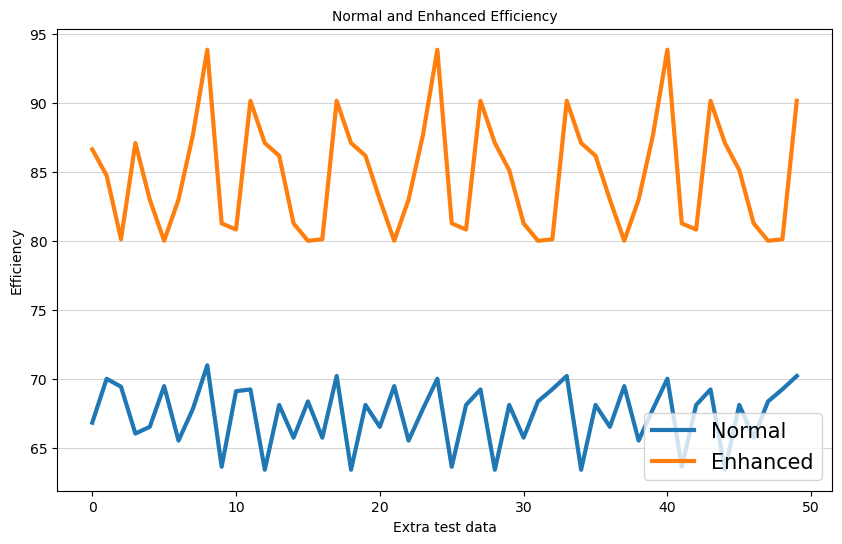

In [35]:
#line plot for normal and enhanced efficiency
plt.figure(figsize=(10, 6))
plt.plot(N_predictions, label='Normal',  linewidth=3, markersize=12)
plt.plot(E_predictions, label='Enhanced',  linewidth=3, markersize=12)
plt.title('Normal and Enhanced Efficiency', fontsize=10)
plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.3, axis='y', which='both')
plt.xlabel('Extra test data', fontsize=10)
plt.ylabel('Efficiency', fontsize=10)
plt.legend(loc='lower right', fontsize=15)
plt.show()



In [36]:
test_input = [[300, 600, 400]]
test_output = Normal.predict(test_input)
print("Normal efficiency: ", test_output)
test_output = Enhanced.predict(test_input)
print("Enhanced efficiency: ", test_output)


Normal efficiency:  [63.63224402]
Enhanced efficiency:  [81.25687438]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Saving models


In [37]:
import pickle
try:
    os.mkdir('pretrained_model')
except:
    pass
pickle.dump(Normal, open('pretrained_model/Normal.pkl', 'wb'))
pickle.dump(Enhanced, open('pretrained_model/K_centroid.pkl', 'wb'))
print("Model saved successfully")

Model saved successfully
